### Question 6 [10 points]

Reproduce one of the images in Figure 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_868/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

## Recreating figure f

In [5]:
import numpy as np
## montery bay latitude
latm=36.78

offshore_deg = 1 / (6400 * np.cos(latm * np.pi / 180))
offshore_deg/180

1.0837954146975763e-06

In [6]:
## get all the data corresponding to the latitude of montery, and longitude 1 km offshore 
montery=ds.analysed_sst.sel(lat=latm,lon=  slice(-121.92-offshore_deg*180/np.pi, -121.92 + offshore_deg*180/np.pi))  
montery

<xarray.DataArray 'analysed_sst' (time: 6443, lon: 1)>
[6443 values with dtype=float32]
Coordinates:
    lat      float32 36.78
  * lon      (lon) float32 -121.9
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [7]:
## get 30 day rolling avg
montery=montery.rolling(time=30, min_periods=1, center=True).mean()
montery

<xarray.DataArray 'analysed_sst' (time: 6443, lon: 1)>
array([[285.16876],
       [285.24033],
       [285.31317],
       ...,
       [286.03033],
       [285.9983 ],
       [285.96082]], dtype=float32)
Coordinates:
    lat      float32 36.78
  * lon      (lon) float32 -121.9
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [9]:
## groupby year
years=montery.groupby(montery.time.dt.year)

In [10]:
y14=years[2014]
y15=years[2015]
y16=years[2016]


In [14]:
## find the mean among all the years to later get the avg of month among all years
mean_val=[]
for year in np.arange(2003, 2014):
    d= years[year].data
    if len(d) > 365:
        d = d[:-1]
    mean_val.append(d)

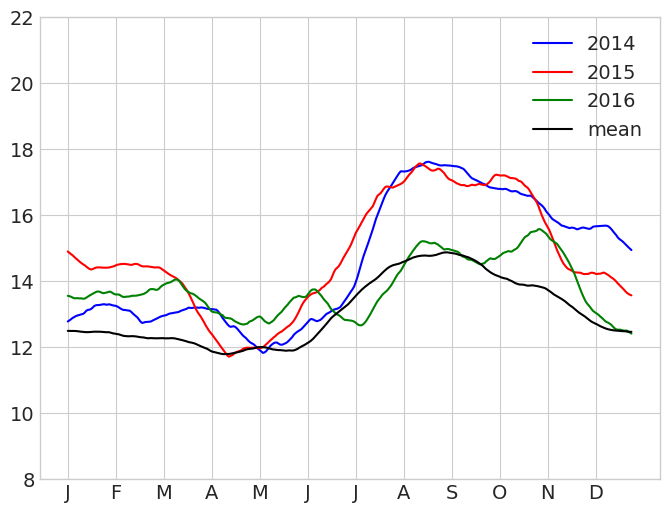

In [79]:
fig, ax = plt.subplots(1,1) 
plt.plot(np.arange(365), y14.data - 273.15,color = 'blue', label = '2014')

plt.plot(np.arange(365), y15.data - 273.15,color = 'red', label = '2015' )

plt.plot(np.arange(365), (y16.data - 273.15)[:-1],color = 'green', label = '2016')


plt.plot(np.arange(365),y,color = 'black', label = 'mean')
# plt.fill_between(np.arange(365),ci_lower,ci_upper, color='b', alpha=.1)

plt.ylim(8,22)
# plt.xlim(1,13)

# ax.set_xticks(np.arange(365))
# ax.set_xticklabels('')

ax.xaxis.set_ticks(np.arange(0, 364, 31))
ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"])
# ax.grid(which='major', axis='both', linestyle='-')

plt.legend()

plt.show()

